In [ ]:
pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 10.8 MB/s eta 0:00:00


In [ ]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generación de una señal ECG
ecg_signal = nk.ecg_simulate(duration=30, sampling_rate=250)

In [ ]:
# Procesamiento de la señal ECG
signals, info = nk.ecg_process(ecg_signal, sampling_rate=250)

In [ ]:
info

{'method_peaks': 'neurokit',
 'method_fixpeaks': 'None',
 'ECG_R_Peaks': array([ 213,  427,  642,  857, 1075, 1291, 1505, 1716, 1930, 2147, 2362,
        2572, 2785, 3003, 3220, 3431, 3639, 3852, 4072, 4289, 4502, 4716,
        4935, 5152, 5362, 5569, 5780, 5996, 6212, 6424, 6639, 6859, 7078,
        7293]),
 'ECG_R_Peaks_Uncorrected': array([ 213,  427,  642,  857, 1075, 1291, 1505, 1716, 1930, 2147, 2362,
        2572, 2785, 3003, 3220, 3431, 3639, 3852, 4072, 4289, 4502, 4716,
        4935, 5152, 5362, 5569, 5780, 5996, 6212, 6424, 6639, 6859, 7078,
        7293]),
 'ECG_fixpeaks_ectopic': [],
 'ECG_fixpeaks_missed': [],
 'ECG_fixpeaks_extra': [],
 'ECG_fixpeaks_longshort': [],
 'ECG_fixpeaks_method': 'kubios',
 'ECG_fixpeaks_rr': array([0.85818182, 0.856     , 0.86      , 0.86      , 0.872     ,
        0.864     , 0.856     , 0.844     , 0.856     , 0.868     ,
        0.86      , 0.84      , 0.852     , 0.872     , 0.868     ,
        0.844     , 0.832     , 0.852     , 0.88     

In [ ]:
#Evaluación de calidad
a=nk.ecg_quality(ecg_signal, rpeaks = None , sampling_rate = 250 , method = 'averageQRS' , approach = None)
print(a)

[0.10876084 0.10876084 0.10876084 ... 0.         0.         0.        ]


In [ ]:
# Extraer señal ECG limpia y los picos R
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

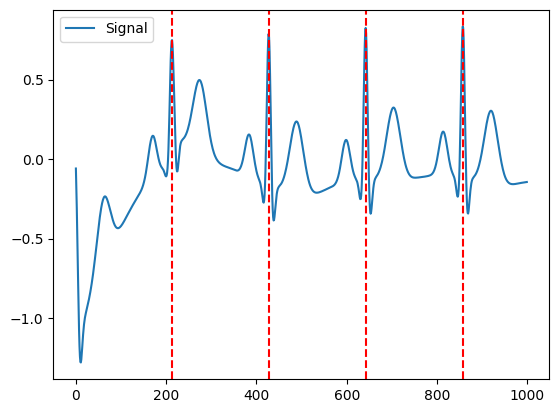

In [ ]:
# Ver los picos R en la señal ECG
plot = nk.events_plot(rpeaks[0:4], cleaned_ecg[0:1000])

In [ ]:
# Extraer los picos T, P, Q y S
p_peaks = info["ECG_P_Peaks"]
t_peaks = info["ECG_T_Peaks"]
q_peaks = info["ECG_Q_Peaks"]
s_peaks = info["ECG_S_Peaks"]

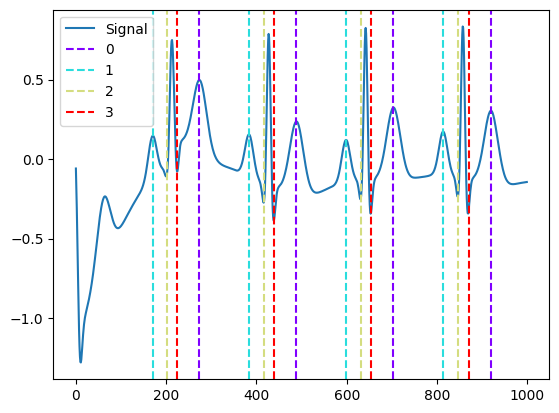

In [ ]:
# Ver los picos T, P, Q y S
nk.events_plot([t_peaks[0:4], p_peaks[0:4], q_peaks[0:4], s_peaks[0:4]], cleaned_ecg[0:1000])

In [ ]:
# Se delinea el complejo
signals, waves = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=250)

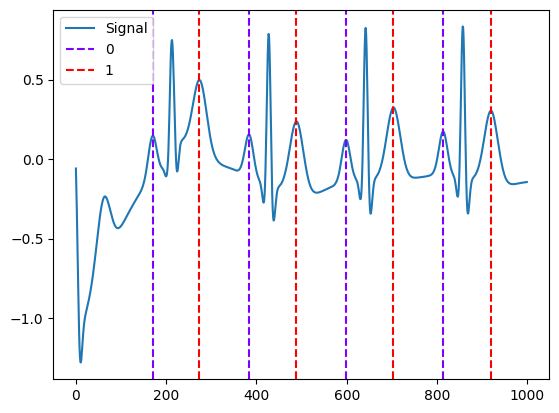

In [ ]:
# Se grafican los picos P y los picos T
nk.events_plot([waves["ECG_P_Peaks"][0:4], waves["ECG_T_Peaks"][0:4]], cleaned_ecg[0:1000])

In [ ]:
picos = nk.signal_findpeaks(ecg_signal)

In [ ]:
picos.keys()

dict_keys(['Peaks', 'Distance', 'Height', 'Width', 'Onsets', 'Offsets'])

In [ ]:
# Delinear el complejo QRS
# Encontrar picos PQST
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=250, method="peak")

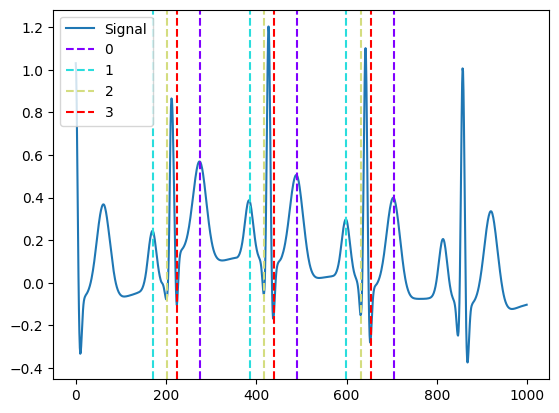

In [ ]:
# Ver los 3 primeros R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal[:1000])

In [ ]:
signal = nk.ecg_simulate(duration=20)
ecg, info = nk.ecg_process(signal)
epochs = nk.epochs_create(ecg, events=[5000, 10000, 15000],epochs_start=-0.1, epochs_end=1.9)
analyze_epochs = nk.ecg_eventrelated(epochs)

In [ ]:
# Frecuencia media
# Identificacion de eventos
events = nk.events_find(signals, threshold_keep='below', event_conditions=None)
# Identificacion de epocas de acuerdo a los eventos
epochs = nk.epochs_create(signals, events, sampling_rate=250, epochs_start=-0.1, epochs_end=1.9)
# Analisis de las epocas
analyze_epochs = nk.ecg_eventrelated(epochs)

/usr/local/lib/python3.10/dist-packages/neurokit2/epochs/eventrelated_utils.py:87: NeuroKitWarning: Input does not have an `ECG_Rate` column. Will skip all rate-related features.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/ecg/ecg_eventrelated.py:133: NeuroKitWarning: Input does not have an `ECG_Phase_Artrial` or `ECG_Phase_Ventricular` column. Will not indicate whether event onset concurs with cardiac phase.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/ecg/ecg_eventrelated.py:160: NeuroKitWarning: Input does not have an `ECG_Quality` column. Quality of the signal is not computed.
  warn(


In [ ]:
analyze_epochs['ECG_Rate_Mean']

KeyError: 'ECG_Rate_Mean'

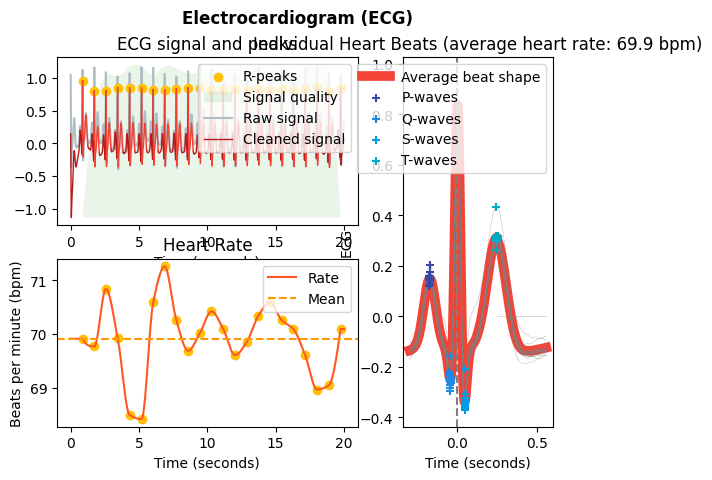

In [ ]:
ecg, info = nk.ecg_process(signal)  # Se toma la señal y se obtiene el dataframe
info["custom_info"] = "Frecuencia de muestreo: 250 Hz, Duración: 10 segundos"
nk.ecg_plot(ecg, info=info)
plt.show()

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from random import randint

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path_AFIB = '/content/drive/MyDrive/Biosenales/df_AFIB.xlsx'
datos_AFIB = pd.read_excel(file_path_AFIB, sheet_name='Sheet1')    # Extraer datos AFIB
file_path_SB = '/content/drive/MyDrive/Biosenales/df_SB.xlsx'
datos_SB = pd.read_excel(file_path_SB, sheet_name='Sheet1')    # Extraer datos SB

In [ ]:
file_path_fMP = '/content/drive/MyDrive/Biosenales/df.xlsx'
datos_fMP = pd.read_excel(file_path_fMP, sheet_name='Sheet1')    # Extraer datos frecuencia de maxima potencia

In [ ]:
# Conversión de datos a array
datos_AFIB=np.array(datos_AFIB)
datos_SB=np.array(pd.DataFrame(datos_SB))
datos_fMP=np.array(pd.DataFrame(datos_fMP))

In [ ]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

# Punto 4
Ejemplo 1

In [ ]:
# Procesamiento de la señal ECG
signals, info = nk.ecg_process(datos_AFIB[1], sampling_rate=500)
#Evaluación de calidad
a=nk.ecg_quality(ecg_signal, rpeaks = None , sampling_rate = 500 , method = 'averageQRS' , approach = None)
print(a)

[0.415623 0.415623 0.415623 ... 0.       0.       0.      ]


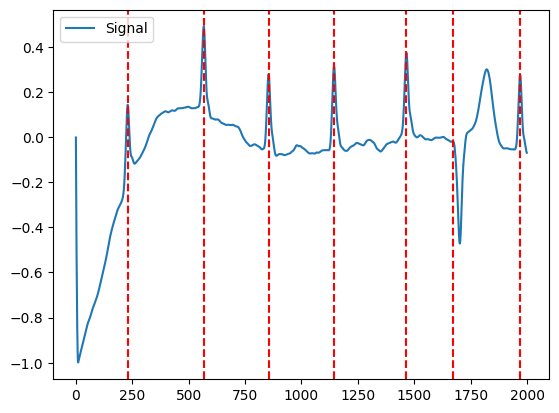

In [ ]:
# Extraer señal ECG limpia y los picos R
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]
# Ver los picos R en la señal ECG
plot = nk.events_plot(rpeaks[0:7], cleaned_ecg[0:2000])

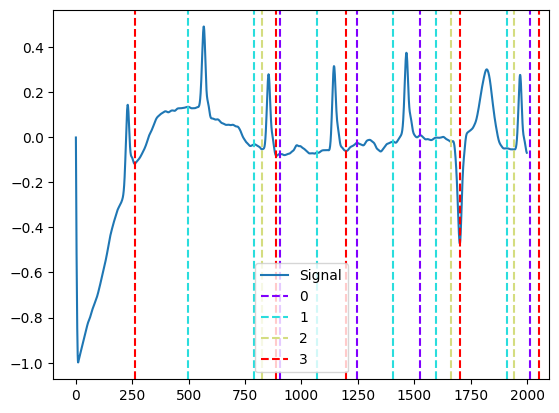

In [ ]:
# Extraer los picos T, P, Q y S
p_peaks = info["ECG_P_Peaks"]
t_peaks = info["ECG_T_Peaks"]
q_peaks = info["ECG_Q_Peaks"]
s_peaks = info["ECG_S_Peaks"]
# Ver los picos T, P, Q y S
nk.events_plot([t_peaks[0:7], p_peaks[0:7], q_peaks[0:7], s_peaks[0:7]], cleaned_ecg[0:2000])

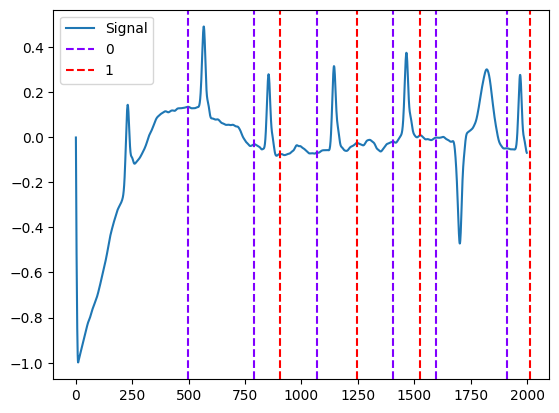

In [ ]:
# Se delinea el complejo
signals, waves = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=500)
# Se grafican los picos P y los picos T
nk.events_plot([waves["ECG_P_Peaks"][0:7], waves["ECG_T_Peaks"][0:7]], cleaned_ecg[0:2000])

In [ ]:
picos = nk.signal_findpeaks(ecg_signal)
print(picos.keys())

dict_keys(['Peaks', 'Distance', 'Height', 'Width', 'Onsets', 'Offsets'])


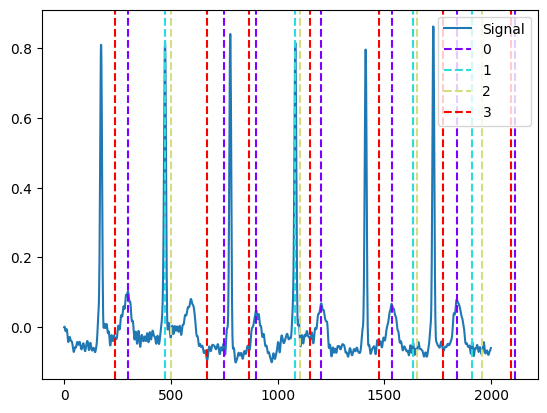

In [ ]:
# Delinear el complejo QRS
# Encontrar picos PQST
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=500, method="peak")
# Ver los 3 primeros R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:7],
                       waves_peak['ECG_P_Peaks'][:7],
                       waves_peak['ECG_Q_Peaks'][:7],
                       waves_peak['ECG_S_Peaks'][:7]], ecg_signal[:2000])

In [ ]:
# Frecuencia media
# Identificacion de eventos
df, info = nk.bio_process(ecg=cleaned_ecg, sampling_rate=500)
# Identificacion de eventos
events = nk.events_find(cleaned_ecg, threshold_keep='below', event_conditions=None)
# Identificacion de epocas de acuerdo a los eventos
epochs = nk.epochs_create(df, events, sampling_rate=500, epochs_start=-0.1, epochs_end=1.9)
# Analisis de las epocas
analyze_epochs = nk.ecg_analyze(epochs, sampling_rate=500)

In [ ]:
analyze_epochs

,Label,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,ECG_Rate_Trend_Linear,ECG_Rate_Trend_Quadratic,ECG_Rate_Trend_R2,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,ECG_Quality_Mean
1,1,2,90.361446,14.168171,-1.340674,2.933903,5.681880,1.705806,1.131231,-14.828871,2.589952,0.913995,NaN,0.000000,NaN,0.000000,0.313388
2,2,1692,73.550369,36.743748,-14.026560,6.943918,18.447628,1.771872,0.554655,-12.852200,-8.272742,0.929835,0.0,0.303071,0.0,0.339713,0.695353
3,3,2832,92.240978,10.851806,-2.420619,1.649610,4.790858,1.409510,0.158258,9.482219,-5.133328,0.475579,0.0,0.424293,0.0,0.493506,0.899622


Ejemplo 2

In [ ]:
# Procesamiento de la señal ECG
signals, info = nk.ecg_process(datos_SB[10], sampling_rate=500)
#Evaluación de calidad
a=nk.ecg_quality(ecg_signal, rpeaks = None , sampling_rate = 500 , method = 'averageQRS' , approach = None)
print(a)

[0.11068851 0.11068851 0.11068851 ... 0.         0.         0.        ]


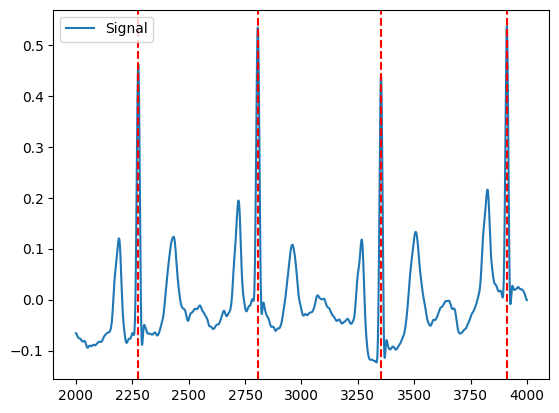

In [ ]:
# Extraer señal ECG limpia y los picos R
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]
# Ver los picos R en la señal ECG
plot = nk.events_plot(rpeaks[3:7], cleaned_ecg[2000:4000])

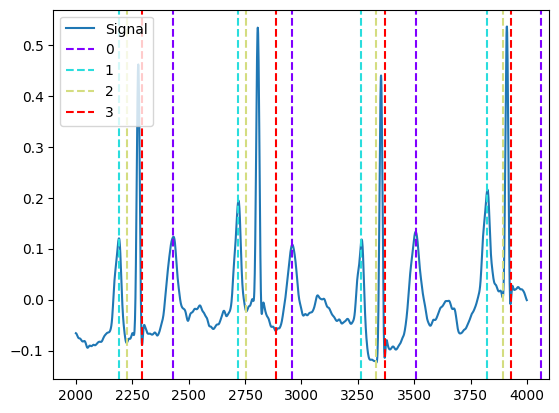

In [ ]:
# Extraer los picos T, P, Q y S
p_peaks = info["ECG_P_Peaks"]
t_peaks = info["ECG_T_Peaks"]
q_peaks = info["ECG_Q_Peaks"]
s_peaks = info["ECG_S_Peaks"]
# Ver los picos T, P, Q y S
nk.events_plot([t_peaks[3:7], p_peaks[3:7], q_peaks[3:7], s_peaks[3:7]], cleaned_ecg[2000:4000])

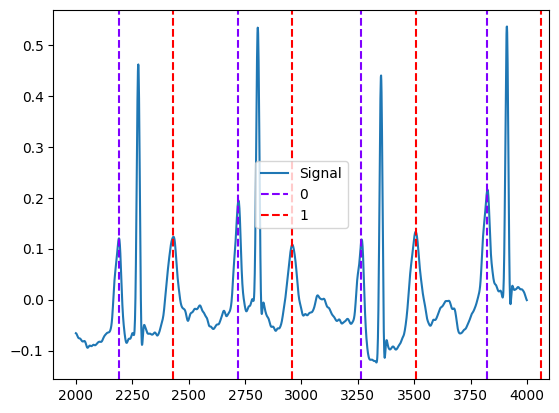

In [ ]:
# Se delinea el complejo
signals, waves = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=500)
# Se grafican los picos P y los picos T
nk.events_plot([waves["ECG_P_Peaks"][3:7], waves["ECG_T_Peaks"][3:7]], cleaned_ecg[2000:4000])

In [ ]:
picos = nk.signal_findpeaks(ecg_signal)
print(picos.keys())

dict_keys(['Peaks', 'Distance', 'Height', 'Width', 'Onsets', 'Offsets'])


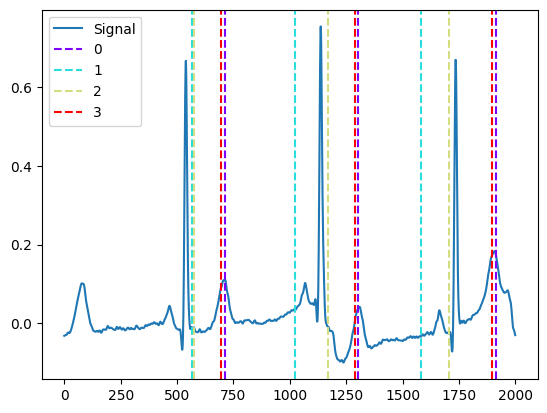

In [ ]:
# Delinear el complejo QRS
# Encontrar picos PQST
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=500, method="peak")
# Ver los 3 primeros R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][0:3],
                       waves_peak['ECG_P_Peaks'][0:3],
                       waves_peak['ECG_Q_Peaks'][0:3],
                       waves_peak['ECG_S_Peaks'][0:3]], ecg_signal[2000:4000])

In [ ]:
# Frecuencia media
# Identificacion de eventos
df, info = nk.bio_process(ecg=cleaned_ecg, sampling_rate=500)
# Identificacion de eventos
events = nk.events_find(cleaned_ecg, threshold_keep='below', event_conditions=None)
# Identificacion de epocas de acuerdo a los eventos
epochs = nk.epochs_create(df, events, sampling_rate=500, epochs_start=-0.1, epochs_end=1.9)
# Analisis de las epocas
analyze_epochs = nk.ecg_analyze(epochs, sampling_rate=500)

In [ ]:
analyze_epochs

,Label,Event_Onset,ECG_Rate_Baseline,ECG_Rate_Max,ECG_Rate_Min,ECG_Rate_Mean,ECG_Rate_SD,ECG_Rate_Max_Time,ECG_Rate_Min_Time,ECG_Rate_Trend_Linear,ECG_Rate_Trend_Quadratic,ECG_Rate_Trend_R2,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular,ECG_Quality_Mean
1,1,3,54.744526,0.675906,0.0,0.129604,0.214954,1.9,0.002102,-0.529923,0.100065,0.940825,NaN,0.0,NaN,0.0,0.841478


In [ ]:
def diez_senales_aleatorias(signal):
    senal_aleatoria = []
    for i in range(10):
        senal_aleatoria.append(signal[randint(0,len(signal))])
    return np.array(senal_aleatoria)

In [ ]:
senal_aleatoria_AFIB = diez_senales_aleatorias(datos_AFIB)
senal_aleatoria_SB = diez_senales_aleatorias(datos_SB)
print("SEÑALES ALEATORIAS SB: ",    senal_aleatoria_SB.shape)
print("SEÑALES ALEATORIAS AFIB: ",  senal_aleatoria_AFIB.shape)

SEÑALES ALEATORIAS SB:  (10, 5001)
SEÑALES ALEATORIAS AFIB:  (10, 5001)


In [ ]:
Caract1 = []   ;   Caract2 = []   ;     Caract3 = []    ;   Caract4 = []  ;   Caract5 = []
Caract6 = []   ;   Caract7 = []   ;     Caract8 = []    ;   Caract9 = []  ;   Caract10 = []
Caract11 = []  ;   Caract12 = []  ;

# Conversión de datos a array
print("AFIB ",len(senal_aleatoria_AFIB))  ;  print("SB   ",len(senal_aleatoria_SB)) ; print("Total",len(datos_fMP));
Sujetos_AFIB_SB = (np.concatenate((senal_aleatoria_AFIB, senal_aleatoria_SB), axis=0))
for i in range (0, len(Sujetos_AFIB_SB)):
  print("Iteración # ",i)
  try:

    ecg_signal = Sujetos_AFIB_SB[i]
    #Procesar la señal de ECG
    signals, info = nk.bio_process(ecg_signal, sampling_rate=500)
    #Analizar la señal de ECG para extraer características
    analysis = nk.ecg_analyze(signals, sampling_rate=500)
    cleaned_ecg = signals["ECG_Clean"]


    Caract1.append(analysis['ECG_Rate_Mean'][0])  ;  Caract2.append (analysis['HRV_SD1'][0])  ;  Caract3.append(analysis['HRV_IALS'][0]);


    r_peaks = info["ECG_R_Peaks"] ; p_peaks = info["ECG_P_Peaks"] ; t_peaks = info["ECG_T_Peaks"]  # Da el punto (tiempo) en que se presentaron los picos
    p_peaks =  [int(valor) for valor in p_peaks if not np.isnan(valor)]
    r_peaks =  [int(valor)for valor in r_peaks if not np.isnan(valor)]
    t_peaks =  [int(valor)for valor in t_peaks if not np.isnan(valor)]

    p_heights = ecg_signal[p_peaks]     ;  p_heights_mean = np.mean(p_heights)
    r_heights = ecg_signal[r_peaks]     ;  r_heights_mean = np.mean(r_heights)          # Da la amplitud!, así que saco promedio de cada onda.
    t_heights = ecg_signal[t_peaks]     ;  t_heights_mean = np.mean(t_heights)


    Caract4.append(p_heights_mean )  ;  Caract5.append (r_heights_mean )  ;  Caract6.append(t_heights_mean );


    valleys = []
    for i in range(1, (len(r_peaks))):
        segment = ecg_signal[r_peaks[i-1]:r_peaks[i]]
        valley_index = np.argmin(segment) + r_peaks[i-1]
        valleys.append(valley_index)
    # Calculate prominence and depth
    prominences = ecg_signal[r_peaks][0:len(r_peaks)-1] - ecg_signal[valleys]
    prominencias = np.mean(prominences)

    rr_intervals = np.diff(r_peaks) / 1000  # Convertir a segundos
    rr_mean = np.mean(rr_intervals)
    rr_variance = np.var(rr_intervals)


    Caract7.append(prominencias)  ;  Caract8.append (rr_mean)  ;  Caract9.append(rr_variance);


    peak_count_R = len(r_peaks)   ;  p_peaks_array = np.array(p_peaks)
    peak_count_P = len(p_peaks_array) ;  t_peaks_array = np.array(t_peaks)
    peak_count_T = len(t_peaks_array) ;  info = nk.signal_findpeaks(ecg_signal)

    Fs=500
    nperseg=1000
    noverlap = int(nperseg/2)
    f, Pxx_den = signal.welch(np.array(ecg_signal), Fs,'hann' ,nperseg, noverlap)
    indice_max = np.argmax(Pxx_den) # nos da el indice, Encontrar la frecuencia con la máxima potencia
    frecuencia_maxima = f[indice_max]
    max_value = Pxx_den[indice_max]


    Caract10.append((peak_count_P+peak_count_R+peak_count_T))  ;  Caract11.append (len(info['Peaks']))  ;  Caract12.append(max_value);
  except ValueError as e:
      print(f"Error processing ECG signal {i}: {e}")
      # Handle the error, e.g., skip this signal or log the error
      continue
## FIN CICLO FOR



AFIB  10
SB    10
Total 5669
Iteración #  0
Error processing ECG signal 0: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  1
Error processing ECG signal 1: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  2
Error processing ECG signal 2: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  3
Error processing ECG signal 3: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  4


/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/complexity/entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
/usr/local/lib/python3.10/dist-packages/neurokit2/complexity/optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
/usr/local/lib/python3.10/dist-packages/neurokit2/complexity/optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k


Iteración #  5
Error processing ECG signal 5: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  6
Error processing ECG signal 6: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  7
Error processing ECG signal 7: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  8
Error processing ECG signal 8: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  9
Error processing ECG signal 9: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  10


/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:486: RuntimeWarning: invalid value encountered in scalar divide
  out["PAS"] = np.sum(np.asarray(lengths) >= 4) / len(lengths)


Error processing ECG signal 10: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  11
Error processing ECG signal 11: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  12
Error processing ECG signal 12: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  13
Error processing ECG signal 13: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  14
Error processing ECG signal 14: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  15
Error processing ECG signal 15: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  16


/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:486: RuntimeWarning: invalid value encountered in scalar divide
  out["PAS"] = np.sum(np.asarray(lengths) >= 4) / len(lengths)


Error processing ECG signal 16: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  17
Error processing ECG signal 17: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  18
Error processing ECG signal 18: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.
Iteración #  19
Error processing ECG signal 19: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.


In [ ]:
ecg_signal = (datos_AFIB[0])
# Procesar la señal de ECG
signals, info = nk.ecg_process(ecg_signal, sampling_rate=500)
# Analizar la señal de ECG para extraer características
analysis = nk.ecg_analyze(signals, sampling_rate=500)
cleaned_ecg = signals["ECG_Clean"]

/usr/local/lib/python3.10/dist-packages/neurokit2/hrv/hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
/usr/local/lib/python3.10/dist-packages/neurokit2/complexity/entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
/usr/local/lib/python3.10/dist-packages/neurokit2/complexity/optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
/usr/local/lib/python3.10/dist-packages/neurokit2/complexity/optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k


In [ ]:
print("1. Frecuencia cardíaca media: ",analysis['ECG_Rate_Mean'][0], "\n2. Desviación estandar de la varianza frecuencia cardíaca: ",analysis['HRV_SD1'][0])
print("3. IALS: ",analysis['HRV_IALS'][0])  # VER varianzas no lineales: https://neuropsychology.github.io/NeuroKit/functions/hrv.html

1. Frecuencia cardíaca media:  92.87781114612291 
2. Desviación estandar de la varianza frecuencia cardíaca:  [[54.24800599]]
3. IALS:  [[0.92307692]]


In [ ]:
list=np.isnan(ecg_signal)
if True in list:
  print("Hay NaN")
else:
  print("No hay NaN")

No hay NaN


In [ ]:
# Convert to NumPy arrays first
r_peaks = np.array(r_peaks)
p_peaks = np.array(p_peaks)
t_peaks = np.array(t_peaks)

# Then remove nan values and convert to int
r_peaks = r_peaks[~np.isnan(r_peaks)].astype(int)
p_peaks = p_peaks[~np.isnan(p_peaks)].astype(int)
t_peaks = t_peaks[~np.isnan(t_peaks)].astype(int)

r_heights = ecg_signal[r_peaks]
r_heights_mean = np.mean(r_heights)
p_heights = ecg_signal[p_peaks]
p_heights_mean = np.mean(p_heights)
t_heights = ecg_signal[t_peaks]
t_heights_mean = np.mean(t_heights)

print("Altura promedio de los picos:", "\n4. P: ",p_heights_mean,"\n5. R: " ,r_heights_mean, "\n6. T: ",t_heights_mean)

Altura promedio de los picos: 
4. P:  0.01321778657598137 
5. R:  -0.04594274325687409 
6. T:  -0.021057351734298683


In [ ]:
t_peaks_mod = [];
q_peaks = np.array (info["ECG_Q_Peaks"])
q_peakss = [valor for valor in q_peaks if not np.isnan(valor)]        # No tener en cuenta los nan

for i in range (0,len(q_peaks)):                                      # Como la funcion no toma todos los valores de q_peaks, se utilizan sólo los que no son nan
  if str(i) == 'nan':
  #if str(q_peaks[i]) !=  'nan':
    t_peaks_mod.append(t_peaks[i])
t_peaks_mod=np.array(t_peaks_mod)

pr_interval = np.mean((r_peaks)-(p_peaks))  /500                      # Intervalo promedio P-R
qt_interval = np.mean((t_peaks_mod)-(q_peakss)) /500                  # Intervalo promedio Q-T

print("7. Ancho medio P-R: ", pr_interval,"segundos","\n8. Ancho medio Q-T: ",qt_interval,"segundos")
# Para el complejo QRS
P_offset = info['ECG_P_Offsets']  ; T_onset = info['ECG_T_Onsets']    # Para este, no encontré el onset de Q y el offset de S, entonces tomé P y T, se pueden tomar los picos Q-S

PT_width = (np.mean(T_onset)-np.mean(P_offset))/500                   # Convertir a segundos
print("9. Duración aproximada complejo QRS con segmento ST: ",PT_width,"segundos")


ValueError: operands could not be broadcast together with shapes (0,) (4,) 

In [ ]:
df

,Caract 1,Caract 2,Caract 3
0,164.370827,[[17.644640357154728]],[[0.6153846153846154]]
